In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Pandas and Numpy libraries for necessary dataframe and numerical operations
import pandas as pd
import numpy as np

#Importing matplotlib and seaborn libraries for plotting operations  
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('float_format', '{:f}'.format) # To print all the numbers in full 

### Task 1: Reading and Inspecting the Application File
Subtask: Import and Read data
Import and read the Application database. 

In [3]:
#Loading the Application dataset stored locally into the application variable
application = pd.read_csv('C:/SHUBHANGI/GroupCaseStudy/application_data.csv')
#Checking the top 5 rows to verify that DF is loaded properly
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Subtask: Inspect the dataframe¶
Inspect the dataframe's columns, shapes, variable types etc

In [4]:
column = application.columns
shapes = application.shape
print("{0}\n {1}".format(column, shapes))

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
 (307511, 122)


As we can see that there are more than 3 lakh rown and 122 columns in the application file

In [5]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Task 2: Cleaning the Data¶
#### Subtask: Inspect Null values
Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column.

In [6]:
#Columnwise null values
percent_wise_null = application.isnull().sum()*100/len(application)
# Calculating no. of columns where null values are more than 50 percent 
len(percent_wise_null[percent_wise_null > 50])

41

#### There are 41 columns where the null values are more than 50 percent. So removing those 41 columns  

In [7]:
#Extract column names from percent_wise_null DF
column_to_delete = percent_wise_null[percent_wise_null > 50].index
column_to_delete

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [8]:
#Dropping the column and making the changes permanent to Application DF using inplace
application.drop(columns = column_to_delete, inplace = True)
application.shape #To confirm columns are indeeed deleted => 122-41 = 81

(307511, 81)

##### Now as advised in the video lecture will check columns having missing values between 0% to 13% so as to comment on value imputation

In [9]:
#Reusing the above code with slight modifications
percent_wise_null = application.isnull().sum()*100/len(application)
# Names of columns where null values are between 0 and 13 percent 
percent_wise_null[ (percent_wise_null > 0) & (percent_wise_null < 13)] #need to use bit wise and operator

AMT_ANNUITY                0.003902
AMT_GOODS_PRICE            0.090403
NAME_TYPE_SUITE            0.420148
CNT_FAM_MEMBERS            0.000650
EXT_SOURCE_2               0.214626
OBS_30_CNT_SOCIAL_CIRCLE   0.332021
DEF_30_CNT_SOCIAL_CIRCLE   0.332021
OBS_60_CNT_SOCIAL_CIRCLE   0.332021
DEF_60_CNT_SOCIAL_CIRCLE   0.332021
DAYS_LAST_PHONE_CHANGE     0.000325
dtype: float64

##### So now we will try to comment about imputing values to 5 -6 columns as per the instructions given for case study but we will not actually impute it

In [10]:
#Lets try to analyse the first column i.e. AMT_ANNUITY
application["AMT_ANNUITY"].describe()

count   307499.000000
mean     27108.573909
std      14493.737315
min       1615.500000
25%      16524.000000
50%      24903.000000
75%      34596.000000
max     258025.500000
Name: AMT_ANNUITY, dtype: float64

##### As we can see that maximum value is Rs.2,58,025 where as mean is Rs.27,108. This can be taken as an indicator that there is an outlier present in the column. We will try to further confirm it using box plot.    

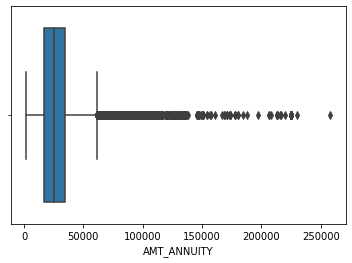

In [11]:
sns.boxplot(x=application["AMT_ANNUITY"]);

####### As can be confirmed from the above boxplot that there are many outliers in the dataset.
#### So it is better to impute the column with Median than with mean.
As advised we have only commented on the imputation and not actually imputed.

In [12]:
#Now lets analyse next column AMT_GOODS_PRICE
application["AMT_GOODS_PRICE"].describe()

count    307233.000000
mean     538396.207429
std      369446.460540
min       40500.000000
25%      238500.000000
50%      450000.000000
75%      679500.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [13]:
#Here also we can see the outlier as the maximum value is higher than 75%. Just confirm with quantile values
application["AMT_GOODS_PRICE"].quantile([0.5,0.8,0.9,0.95,0.99,1])


0.500000    450000.000000
0.800000    814500.000000
0.900000   1093500.000000
0.950000   1305000.000000
0.990000   1800000.000000
1.000000   4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

##### As we can see 99 percentile value is 18 lakh where as maximum value is 40.50 lakh, hence the mean is affected which is understandable also as the column gives us information about the value of goods for which loan is given  which in some cases can be higher
##### So again we will use median value for imputing the column but we will actually not impute value

##### Lets Try to analyse the next column

In [14]:
application["NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [15]:
#Lets check the value count of each of the values in the column
application["NAME_TYPE_SUITE"].value_counts(normalize = True)

Unaccompanied     0.811596
Family            0.131112
Spouse, partner   0.037130
Children          0.010669
Other_B           0.005780
Other_A           0.002828
Group of people   0.000885
Name: NAME_TYPE_SUITE, dtype: float64

#### As we can see almost 81 percent of the time the person comes unaccompanied so we may use the Unaccompanied value i.e. Mode value to impute column

##### Now we will try to comment about imputing missing values in CNT_FAM_MEMBERS column by analysing it 

In [16]:
application["CNT_FAM_MEMBERS"].value_counts(normalize = True)

2.000000    0.514967
1.000000    0.220634
3.000000    0.171055
4.000000    0.080313
5.000000    0.011310
6.000000    0.001327
7.000000    0.000263
8.000000    0.000065
9.000000    0.000020
10.000000   0.000010
14.000000   0.000007
16.000000   0.000007
12.000000   0.000007
20.000000   0.000007
11.000000   0.000003
13.000000   0.000003
15.000000   0.000003
Name: CNT_FAM_MEMBERS, dtype: float64

###### As we can see majority of the customers are having 2 family members we will impute the column with 2 i.e. with the mode value
But we will not actually impute it 

In [17]:
application["EXT_SOURCE_2"].describe()

count   306851.000000
mean         0.514393
std          0.191060
min          0.000000
25%          0.392457
50%          0.565961
75%          0.663617
max          0.855000
Name: EXT_SOURCE_2, dtype: float64

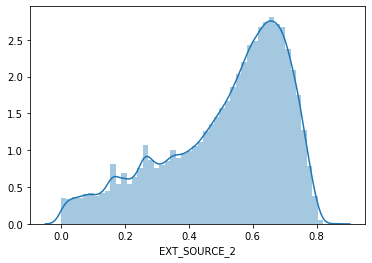

In [18]:
sns.distplot(application["EXT_SOURCE_2"]);

##### As we can see that data is right skewed in case of EXT_SOURCE_2. So we will inpute the column with Median value.

In [19]:
application["OBS_30_CNT_SOCIAL_CIRCLE"].describe()

count   306490.000000
mean         1.422245
std          2.400989
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [20]:
#Here also we can see the outlier as the maximum value is higher than 75%. Just confirm with quantile values
application["OBS_30_CNT_SOCIAL_CIRCLE"].quantile([0.5,0.6,0.8,0.9,0.95,0.99,1])

0.500000     0.000000
0.600000     1.000000
0.800000     3.000000
0.900000     4.000000
0.950000     6.000000
0.990000    10.000000
1.000000   348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

As we can see that there are some outlier values so we may impute the column with Median value which is zero.

Null Value Handling:

AMT_ANNUITY  : Since there  was minimum difference between max and mean value, this suggested presence of outliers (confirmed using box plot) and hence null values need to imputed by median instead of mean.
AMT_GOOD_PRICE : Since 99 percentile value and max value had huge difference, it confirmed the presence of outliers and hence null values need to be imputed by median.
NAME_TYPE_SUITE : Since this is a categorical column, we imputed the  null value with Mode  , and after imputation confirmed that no major change  has occurred in percentage of  categories.
CNT_FAM_MEMBERS : Again a categorical column, hence used mode value
EXT_SOURCE_2: On plotting , a right skewed plot is observed that confirms outliers and hence median is well suited for imputing null values
OBS_30_CNT_SOCIAL_CIRCLE : Here also outliers observed hence null value imputed with median


In [21]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [22]:
#Now we will find the numberical and categorical variables
all_features = application.nunique().sort_values()
numerical_features  = all_features[all_features >8].index
categorical_features = all_features[all_features <= 8].index

In [23]:
numerical_features

Index(['DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'FLOORSMAX_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_MEDI', 'ORGANIZATION_TYPE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'DAYS_LAST_PHONE_CHANGE', 'TOTALAREA_MODE', 'AMT_CREDIT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION',
       'DAYS_BIRTH', 'EXT_SOURCE_2', 'SK_ID_CURR'],
      dtype='object')

##### As we can see that except ORGANIZATION_TYPE and OCCUPATION_TYPE all are numerical columns so we will remove these two from numeric and add it to categorical 

In [24]:
numerical_features = list(numerical_features)
numerical_features.remove('ORGANIZATION_TYPE')
numerical_features.remove('OCCUPATION_TYPE')
numerical_features

['DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLOORSMAX_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLOORSMAX_MEDI',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'EXT_SOURCE_3',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'DAYS_LAST_PHONE_CHANGE',
 'TOTALAREA_MODE',
 'AMT_CREDIT',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_REGISTRATION',
 'DAYS_BIRTH',
 'EXT_SOURCE_2',
 'SK_ID_CURR']

In [25]:
categorical_features = list(categorical_features)
categorical_features.append('ORGANIZATION_TYPE')
categorical_features.append('OCCUPATION_TYPE')
categorical_features

['FLAG_DOCUMENT_3',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_2',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_7',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_6',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'FLAG_MOBIL',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_20',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'REGION_RATING_CLIENT_W_CITY',
 'CODE_GENDER',
 'REGION_RATING_CLIENT',
 'NAME_EDUCATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_T

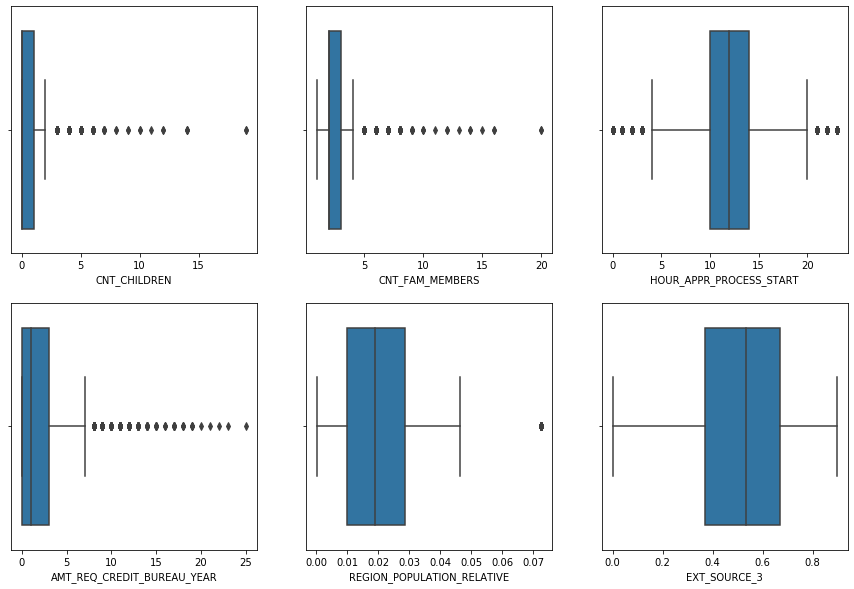

In [26]:
##### Now we will comment on the outliers for few of the columns
#CNT_CHILDREN,CNT_Fam, HOUR_APPR ,AMT_REQ_CRE, REGION_POP Reative, EXT_SOURCE 3
sub_num_feature = ['CNT_CHILDREN','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_YEAR',
 'REGION_POPULATION_RELATIVE','EXT_SOURCE_3']
plt.figure(figsize = (15,10))
for i in range (6):
    plt.subplot(2,3,i+1)
    sns.boxplot(application[sub_num_feature[i]])
plt.show()

#### Comments regarding the outliers and reasoning
1. We can see some outliers in the CNT_CHILDREN column. Most of the customers are having children in the range of 0 to 2 but having children more than 5 is rare but certainly possible hence we may bin them in case of analysis.
2. We can see some outliers in CNT_FAM_MEMBERS column. Most people have 2 to 3 family members. But some people have as large as 20 which is a possibility in indian context where joint families exist.
3. We can see some outliers in case of HOUR_APPR_PROCESS_START. We can see that most of the customers have applied between 10 AM to 2 PM which can be considered as office time. But it may be possible that bank has online application for loan and hence other timings may very well be possbile. Or else they can be considered as outliers
4. We can see some outliers in AMT_REQ_CREDIT_BUREAU_YEAR. We can see that for most customers no of enquiries to credit bureau are in the range 0 to 3 which is a good sign. Generally if credit bureau enquiries are more than 6 customer is not considered credit worthy. Since the customer have many options to take credit more than 10 credit enquiries is very much possible and in reality the values are possible.
5. There is only a single outlier in REGION_POPULATION_RELATIVE who is living in a very populated area.
6. There is no outlier in EXT_SOURCE_3 column.

#### Binning of continuous variable

We will categorise the CREDIT_AMT into various categories i.e. Low_exposure, moderate_exposure, medium_exposure, High_exposure and very_high_exposure based on credit amount given to the customers

In [27]:
bins = [0,50000,200000,500000,1000000,2000000,2000000000] #Last value is given very high so as to include all other possible loan amounts 
Categories = ["Very_Low_Exposure", "Low_Exposure","Moderate_Exposure","Medium_Exposure","High_Exposure","Very_High_Exposure"]
application["Credit_Exposure"] = pd.cut(application["AMT_CREDIT"],bins, labels = Categories)

In [28]:
application["Credit_Exposure"].value_counts(normalize = True)

Moderate_Exposure    0.368081
Medium_Exposure      0.351835
High_Exposure        0.155949
Low_Exposure         0.115713
Very_High_Exposure   0.006598
Very_Low_Exposure    0.001824
Name: Credit_Exposure, dtype: float64

As we can see that most of the loans of the bank are in the category Moderate to Medium exposure i.e. between 2 to 10 lakh (almost 72%)

#### Now we will create bins for income i.e. AMT_INCOME_TOTAL column.We will create following categories - 0-1 lakh, 1-3 lakh, 3-5 lakh, 5-10 lakh, 10-15 lakh, 15-20 lakh and 20+

In [29]:
bins = [0,100000,300000,500000,1000000,1500000,2000000,150000000000000] #Last value is given very high so as to include all other possible loan amounts 
Categories = ["Low_Income","Moderate_Income","Medium_Income","Moderately_High_Income","High_Income","Very_High_Income","Very_Very_high_Income"]
application["Income_Category"] = pd.cut(application["AMT_INCOME_TOTAL"],bins, labels = Categories)

In [30]:
application["Income_Category"].value_counts(normalize = True)

Moderate_Income          0.718914
Low_Income               0.207141
Medium_Income            0.065159
Moderately_High_Income   0.007974
High_Income              0.000540
Very_Very_high_Income    0.000143
Very_High_Income         0.000130
Name: Income_Category, dtype: float64

#### This gives us a clear idea that the firm is mostly lending to people whose income is less than 3 lakh and 90 percent of client base is from that income level.

### Calculating the imbalance

In [31]:
print(100*len(application[application["TARGET"]==1])/len(application))
100*len(application[application["TARGET"]==0])/len(application)

8.072881945686495


91.92711805431351

As we can see that in almost 92% of the cases there is no diffuclty in payment and only in around 8% of the cases there is a payment difficulty. So there is a data imbalance but in reality if we see the banking industry in general the stressed assets will not be more than 10 percent or else the bank will not survive 

### Dividing the data into 2 based on the value of Target variable

In [32]:
Payment_difficulty = application.loc[application["TARGET"]==1] #Loans where there was a difficulty in payments
No_Payment_Difficulty = application.loc[application["TARGET"]==0] ##Loans where there was NO difficulty in payments

## Univariate Analysis
Now we will do the univariate analysis for some of the categorical varibles with respect ot Target column. We will use the original dataframe for this purpose. 

In [33]:
categorical_features

['FLAG_DOCUMENT_3',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_2',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_7',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_6',
 'FLAG_CONT_MOBILE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'FLAG_MOBIL',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_20',
 'FLAG_EMP_PHONE',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'REGION_RATING_CLIENT_W_CITY',
 'CODE_GENDER',
 'REGION_RATING_CLIENT',
 'NAME_EDUCATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_T

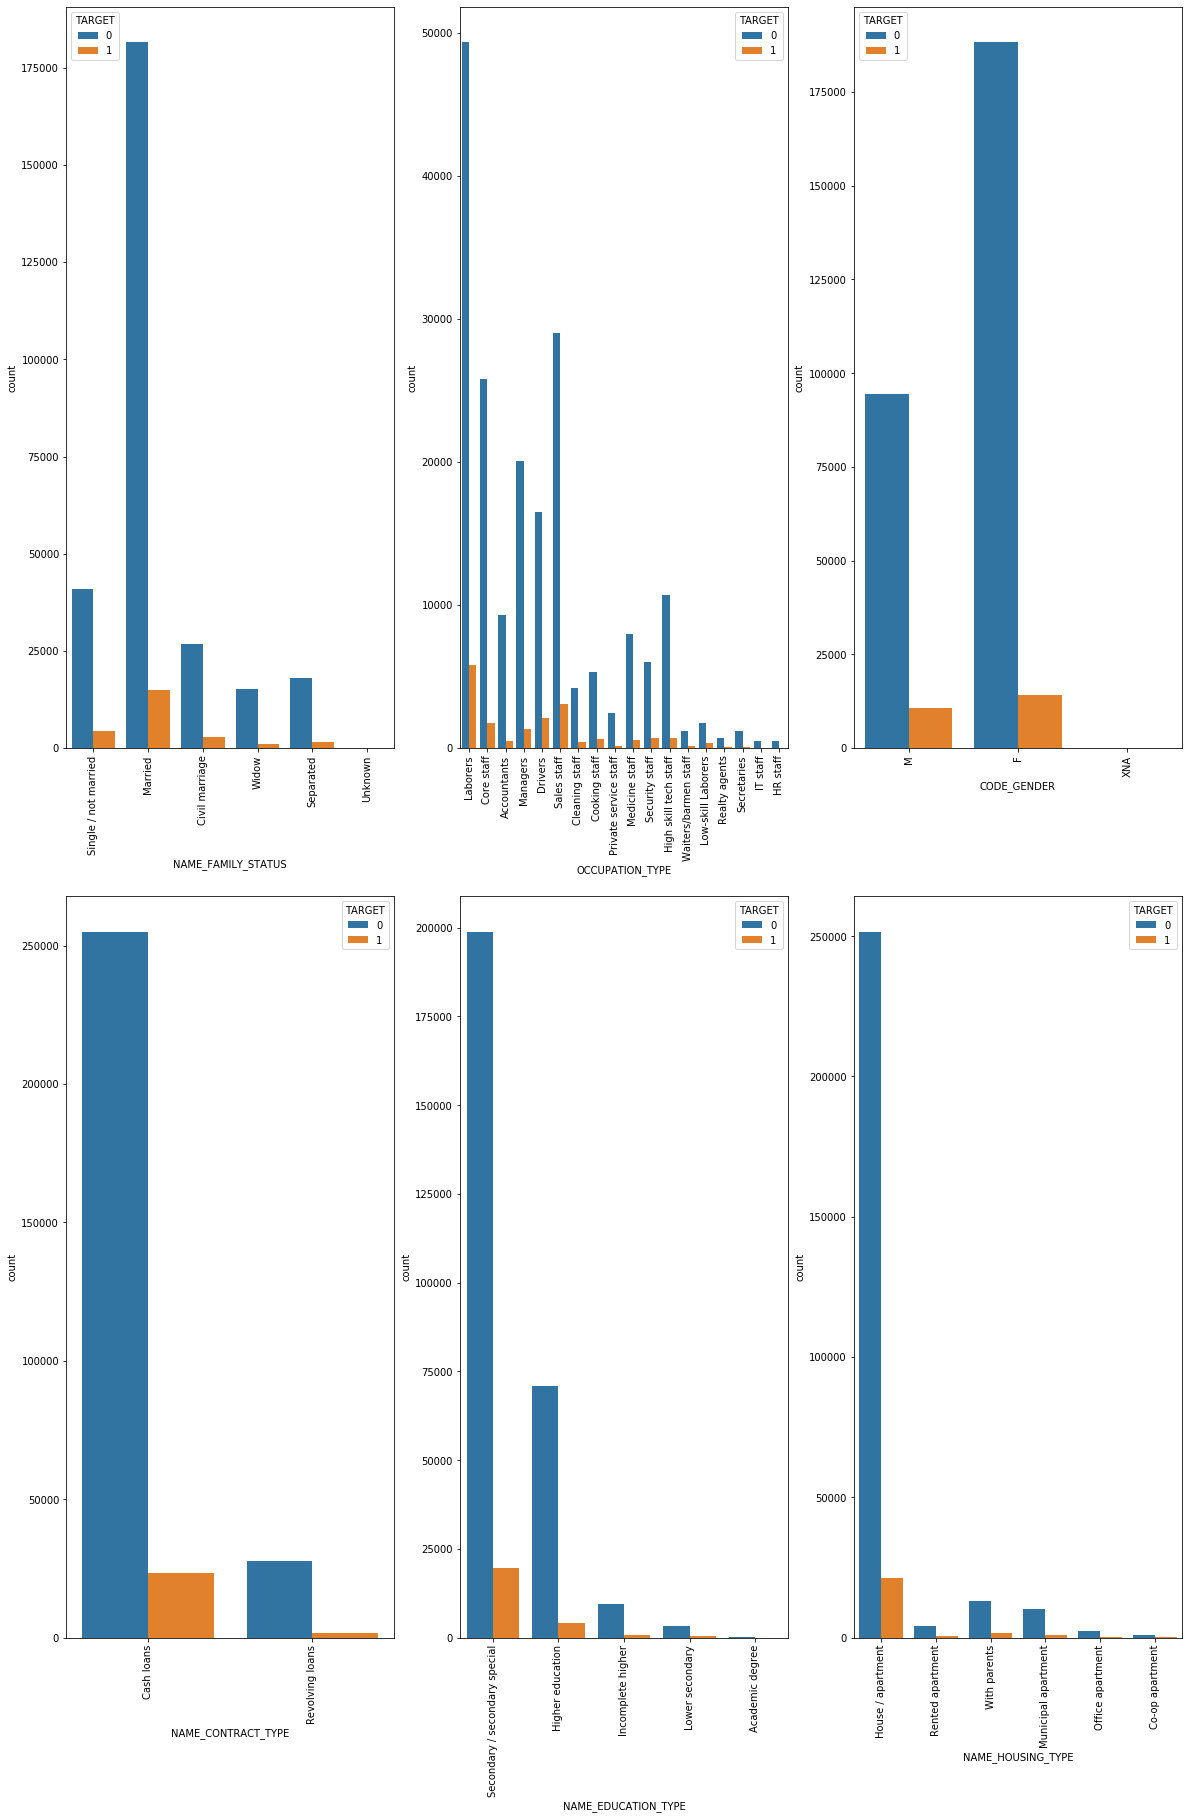

In [34]:
#We will select some catagorical features for analysis 
sub_cat_features = ['NAME_FAMILY_STATUS','OCCUPATION_TYPE','CODE_GENDER','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE',
                    'NAME_HOUSING_TYPE']
plt.figure(figsize = (20, 30))
for i in enumerate(sub_cat_features):
    plt.subplot(2, 3, i[0]+1)
    splot = sns.countplot(x = i[1], hue = 'TARGET', data = application)
    plt.xticks(rotation = 90)

1. We can see from the above that most of the customers of the bank are Married (married and civil marriage cateogry). The second most customers are in the category single.
2. Most of the customers of the bank are either laborers or sales staff.
3. Most of the customers of the bank are females and comppared to female borrowers there is comparatively more payment difficulty in case of male borrowers.
4. There are more cash loans as compared to revolving loans.
5. Most of the customers with secondary/secondary special education or with higher education. However, there are very few customers with academic degree.
6. Most of the customers are with Housing Type as House/Apartment

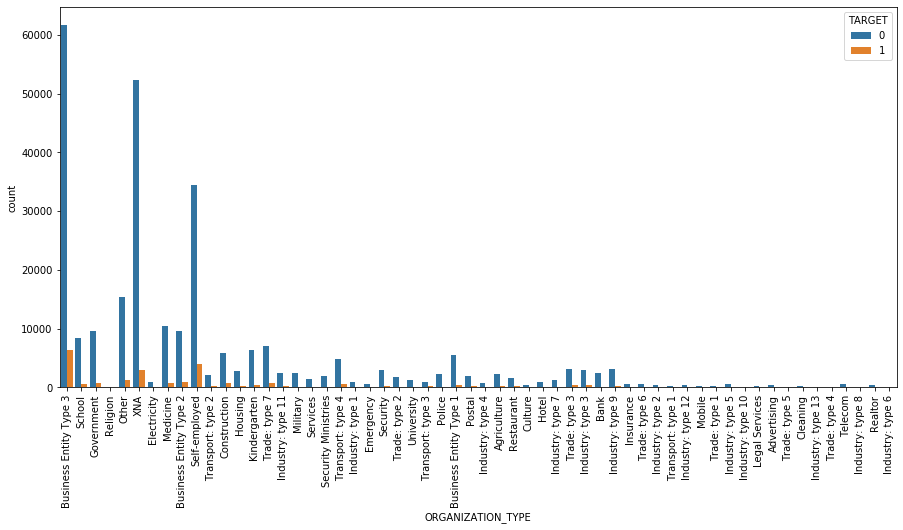

In [35]:
plt.figure(figsize = (15, 7))
splot = sns.countplot(x = 'ORGANIZATION_TYPE', hue = 'TARGET', data = application)
plt.xticks(rotation = 90)
plt.show()

#### As we can see that most of the customers of the bank are from Business Entity Type 3 organization type. There are many customers for which the organization type is not available with the bank. 

## Finding correlation between different columns of dataframes for Target 0 and 1 

In [36]:
Payment_difficulty.shape
numerical_features

['DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLOORSMAX_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLOORSMAX_MEDI',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'EXT_SOURCE_3',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'DAYS_LAST_PHONE_CHANGE',
 'TOTALAREA_MODE',
 'AMT_CREDIT',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_REGISTRATION',
 'DAYS_BIRTH',
 'EXT_SOURCE_2',
 'SK_ID_CURR']

In [37]:
# Taking only necessary column for correlation column
df_Payment_difficulty = ['DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'CNT_CHILDREN', 
                        'HOUR_APPR_PROCESS_START', 'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE', 
                        'REGION_POPULATION_RELATIVE','EXT_SOURCE_3','AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL','AMT_CREDIT',
                        'DAYS_ID_PUBLISH','DAYS_EMPLOYED','AMT_ANNUITY','DAYS_REGISTRATION','DAYS_BIRTH','EXT_SOURCE_2']
                    

In [38]:
corr = Payment_difficulty[df_Payment_difficulty].corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.head()

,VAR1,VAR2,Correlation
0,DEF_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,nan
1,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,nan
2,DEF_60_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,nan
3,DEF_60_CNT_SOCIAL_CIRCLE,HOUR_APPR_PROCESS_START,nan
4,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,nan


In [39]:
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(20)

,VAR1,VAR2,Correlation
89,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,1.000000
178,AMT_CREDIT,AMT_GOODS_PRICE,0.980000
17,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.870000
231,AMT_ANNUITY,AMT_CREDIT,0.750000
229,AMT_ANNUITY,AMT_GOODS_PRICE,0.750000
267,DAYS_BIRTH,DAYS_EMPLOYED,0.580000
69,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.340000
86,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.330000
269,DAYS_BIRTH,DAYS_REGISTRATION,0.290000
257,DAYS_BIRTH,CNT_CHILDREN,0.260000


So from above correlation we can easily conclude that :
    1. There is a strong correlation between amt_credit and amt_good_price
    2. There is a strong correlaion between amt_annuity and Amt_credit
    3. There is  correlation between days_birth and Day_employed, that means a person with more age will have more work experience.

In [40]:
corrdf.sort_values(by = 'Correlation', ascending = False).tail(30)

,VAR1,VAR2,Correlation
107,REGION_POPULATION_RELATIVE,OBS_30_CNT_SOCIAL_CIRCLE,0.010000
213,DAYS_EMPLOYED,AMT_INCOME_TOTAL,0.010000
88,OBS_30_CNT_SOCIAL_CIRCLE,HOUR_APPR_PROCESS_START,0.010000
188,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,0.010000
225,AMT_ANNUITY,OBS_60_CNT_SOCIAL_CIRCLE,0.010000
119,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,0.010000
71,OBS_60_CNT_SOCIAL_CIRCLE,HOUR_APPR_PROCESS_START,0.010000
239,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,0.010000
242,DAYS_REGISTRATION,OBS_60_CNT_SOCIAL_CIRCLE,0.010000
243,DAYS_REGISTRATION,OBS_30_CNT_SOCIAL_CIRCLE,0.010000


So from above correlation we can easily conclude that :
1. There is a very weak correlation between days_employed and amt_income_total, this shows that experience have little impact on salary intake.
2. There is weak correlation between Days_birth and AMT_annuity, this shows that credit amount decrease with increase in age
2. There is a strong correlaion between amt_annuity and Amt_credit
3. There is  correlation between days_birth and Day_employed, that means a person with more age will have more work experience.

### Correlation Analysis for No payment difficulty 

In [41]:
corr = No_Payment_Difficulty.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,nan
1,SK_ID_CURR,TARGET,nan
2,SK_ID_CURR,CNT_CHILDREN,nan
3,SK_ID_CURR,AMT_INCOME_TOTAL,nan
4,SK_ID_CURR,AMT_CREDIT,nan


In [42]:
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
893,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.000000
2411,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.000000
2689,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.000000
2342,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.990000
2413,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.990000
2275,FLOORSMAX_MODE,FLOORSMAX_AVG,0.990000
412,AMT_GOODS_PRICE,AMT_CREDIT,0.990000
2206,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.970000
2344,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.960000
1379,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950000


So from above correlation we can easily conclude that :
1. There is a strong correlation between amt_credit and amt_good_price
2. There is a correlaion between amt_annuity and Amt_credit
3. There is  correlation between days_birth and Day_employed, that means a person with more age will have more work experience.

In [43]:
corrdf.sort_values(by = 'Correlation', ascending = False).tail(30)

,VAR1,VAR2,Correlation
3540,FLAG_DOCUMENT_12,AMT_CREDIT,0.000000
3538,FLAG_DOCUMENT_12,CNT_CHILDREN,0.000000
3536,FLAG_DOCUMENT_12,SK_ID_CURR,0.000000
3517,FLAG_DOCUMENT_11,FLAG_DOCUMENT_9,0.000000
3545,FLAG_DOCUMENT_12,DAYS_EMPLOYED,0.000000
3515,FLAG_DOCUMENT_11,FLAG_DOCUMENT_7,0.000000
3512,FLAG_DOCUMENT_11,FLAG_DOCUMENT_4,0.000000
3510,FLAG_DOCUMENT_11,FLAG_DOCUMENT_2,0.000000
1440,HOUR_APPR_PROCESS_START,FLAG_MOBIL,0.000000
3508,FLAG_DOCUMENT_11,DEF_60_CNT_SOCIAL_CIRCLE,0.000000


So from above correlation we can easily conclude that :
1. There is a very weak correlation between days_employed and amt_income_total, this shows that experience have little impact on salary intake.
2. There is weak correlation between Days_birth and AMT_annuity, this shows that credit amount decrease with increase in age


### Final Conclusion :
Highest correlation factor are same irrespective it is Target 0 or Target 1


In [44]:
numerical_features

['DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLOORSMAX_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLOORSMAX_MEDI',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'EXT_SOURCE_3',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'DAYS_LAST_PHONE_CHANGE',
 'TOTALAREA_MODE',
 'AMT_CREDIT',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_REGISTRATION',
 'DAYS_BIRTH',
 'EXT_SOURCE_2',
 'SK_ID_CURR']

(-1, 7)

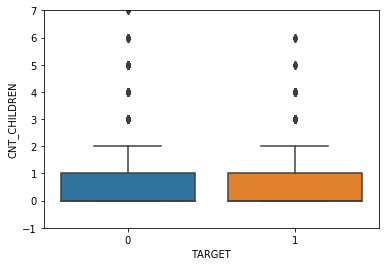

In [45]:
#We will select some numerical features for univariate analysis 
sub_num_features = ['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2']

#Now we wull plot CNT_CHILDREN Vs Target

sns.boxplot(x='TARGET', y = 'CNT_CHILDREN', data = application, orient = 'v')
plt.ylim(-1, 7) #Limiting the no of children variable for improving the look of the boxplot

#### As we can see from the above that no of childrens are almost same to both categories of customers i.e. those who have faced difficulty in payment and those who have not

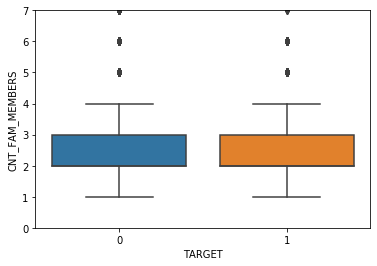

In [46]:
#Now we will plot CNT_FAM_MEMBERS Vs Target

sns.boxplot(x='TARGET', y = 'CNT_FAM_MEMBERS', data = application)
plt.ylim(0, 7); #Limiting the Y variable for improving the look of the boxplot

Here again we can see that there is no link between the no of family member a person has and difficulty in payment.

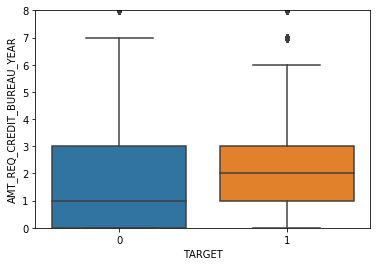

In [47]:
#Now we will plot AMT_REQ_CREDIT_BUREAU_YEAR Vs Target

sns.boxplot(x='TARGET', y = 'AMT_REQ_CREDIT_BUREAU_YEAR', data = application)
plt.ylim(0, 8); #Limiting the Y variable for improving the look of the boxplot

We can see from the above that for those customers for whom there was not a single credit enquiry during the a year one month before application, there is very less payment diffculty. 
We can also see that median for credit bureau enquiries in case of customers where no payment diffculty happened in 1 where median in cases where there is payment difficulty is 2. 
#### So preference shoule be given to customers with less no of credit bureau enquiries

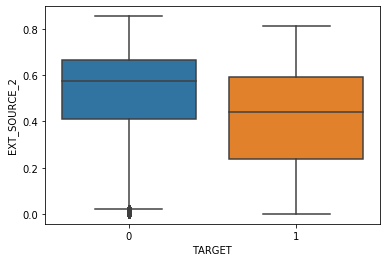

In [48]:
#Now we will plot EXT_SOURCE_2 Vs Target
sns.boxplot(x='TARGET', y = 'EXT_SOURCE_2', data = application);

As we can see from the above there is less payment difficulty in case of people having external credit rating score of 0.5 and above. 
The mean external credit rating source 3 for payment difficulty customers is 0.4.

##### So preference should be given to customers with more external credit rating source 3

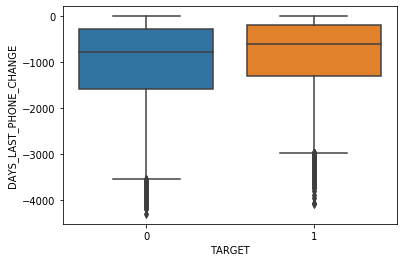

In [49]:
#Now we will plot DAYS_LAST_PHONE_CHANGE Vs Target
sns.boxplot(x='TARGET', y = 'DAYS_LAST_PHONE_CHANGE', data = application);



As we can see that customers with no payment difficulty dont change phone frequently as compared to customers where there is a payment difficulty. However, the difference is not large enough.

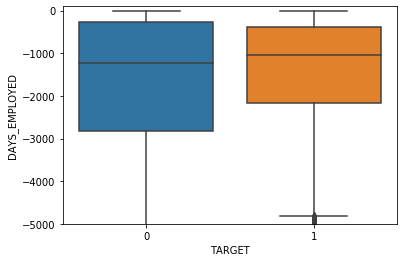

In [50]:
#Now we will plot DAYS_EMPLOYED Vs Target
sns.boxplot(x='TARGET', y = 'DAYS_EMPLOYED', data = application);
plt.ylim(-5000, 100);

As we can see that in case of customers who have employed for more days there is less payment difficulty.

## Bivariate and Multivariate Analysis

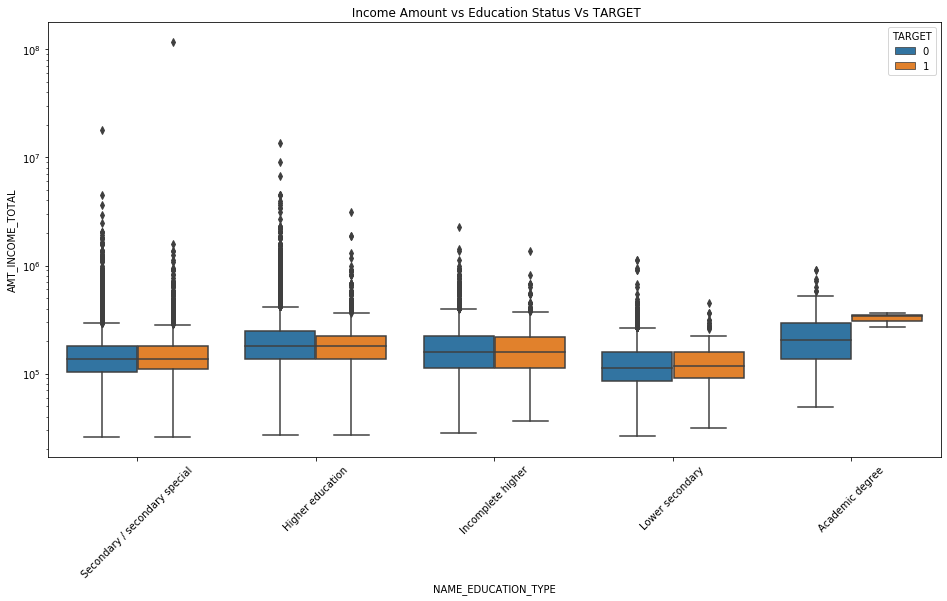

In [51]:
#Payment Difficulty Income Amount vs Education Status Vs Target

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =application, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v')
plt.title(' Income Amount vs Education Status Vs TARGET');

We can make following observations from the above
1. Organisation should try to focus more on people with academic degree
2. People with incomeplete higher and higher education has lesser payment difficulty. 
3. There are lot of outliers in case of higher education.

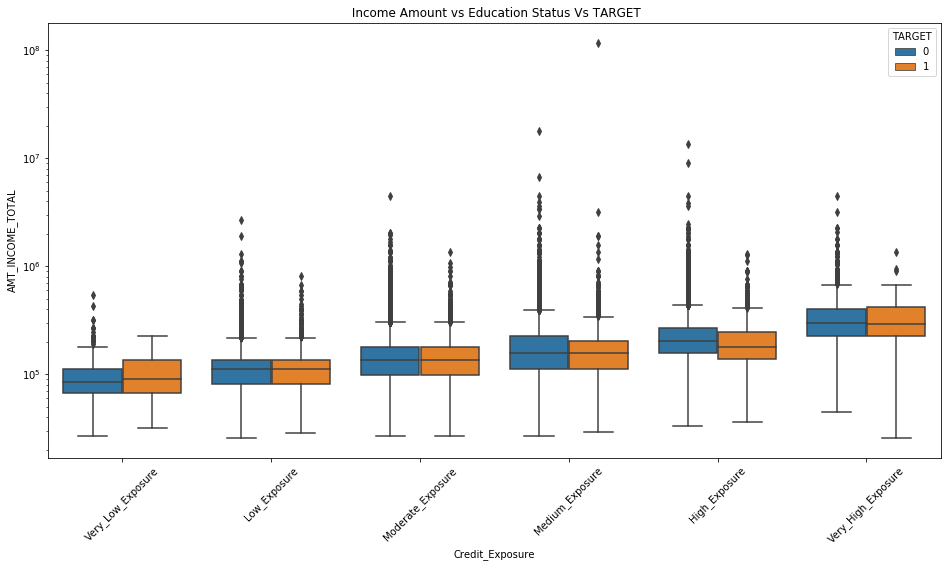

In [52]:
#Income Amount vs Credit Exposure Vs Target

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =application, x='Credit_Exposure',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v')
plt.title(' Income Amount vs Education Status Vs TARGET');

We can make following observations from the above
1. Organization is taking exposure to customers based on their income level. As with increase in exposure we can observe the increase in income as well.
2. There is more payment difficulty in cases where there is low exposure i.e. exposure of less than 50,000/-

In [53]:
pd.crosstab(application['NAME_EDUCATION_TYPE'],[application['FLAG_OWN_CAR'],application['FLAG_OWN_REALTY'],
                                               application['TARGET']],margins=True, margins_name="Total" ) 

FLAG_OWN_CAR                       N                           Y               \
FLAG_OWN_REALTY                    N             Y             N            Y   
TARGET                             0     1       0      1      0     1      0   
NAME_EDUCATION_TYPE                                                             
Academic degree                   32     1      68      1     16     0     45   
Higher education               13270   832   27827   1662   9327   438  20430   
Incomplete higher               2129   248    3726    340   1245    94   2305   
Lower secondary                  843   129    1717    182    301    36    538   
Secondary / secondary special  40126  4362   95937   9492  19068  1702  43736   
Total                          56400  5572  129275  11677  29957  2270  67054   

FLAG_OWN_CAR                          Total  
FLAG_OWN_REALTY                              
TARGET                            1          
NAME_EDUCATION_TYPE                          
Academic degree                   1     164  
Higher education               1077   74863  
Incomplete higher               190   10277  
Lower secondary                  70    3816  
Secondary / secondary special  3968  218391  
Total                          5306  307511

As we can see frm the above that -

1.there is more possibility of difficulty in payment in case of customer with Secondary / secondary specialeducation and not having car and realty.
2. People with Lower secondary have more probabilty of payment difficulty compared to other education categories. 

## Now we will analyse the Previous Application Data

In [54]:
prev_appl = pd.read_csv("C:/SHUBHANGI/GroupCaseStudy/previous_application.csv")
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,0.000000,17145.000000,SATURDAY,15,...,Connectivity,12.000000,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,nan,607500.000000,THURSDAY,11,...,XNA,36.000000,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,nan,112500.000000,TUESDAY,11,...,XNA,12.000000,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,nan,450000.000000,MONDAY,7,...,XNA,12.000000,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,nan,337500.000000,THURSDAY,9,...,XNA,24.000000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [55]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning - Previous Application Data 
Checking the columns having more than 40% null values

In [56]:
#Columnwise null values
percent_wise_null = prev_appl.isnull().sum()*100/len(prev_appl)
# Calculating no. of columns where null values are more than 40 percent 
len(percent_wise_null[percent_wise_null > 40])

11

There are 11 columns where null values are more than 40 percent. So we will remove them.

In [57]:
#Extract column names from percent_wise_null DF
column_to_delete = percent_wise_null[percent_wise_null > 40].index
column_to_delete

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [58]:
#Dropping the column and making the changes permanent to prev_appl using inplace
prev_appl.drop(columns = column_to_delete, inplace = True)
prev_appl.shape #To confirm columns are indeeed deleted => 37-11 = 26

(1670214, 26)

##### We will now clean the rowwise null values

In [59]:
# We will now delete the rows where 3 or more columns are empty (nan)
prev_appl.dropna(thresh = 23,inplace=True)

In [60]:
prev_appl.shape

(1669868, 26)

As we can see the few rows got deleted

## Univariate analysis -Prev Application

In [61]:
prev_appl['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)

XAP                                0.552328
XNA                                0.405971
Repairs                            0.014232
Other                              0.009347
Urgent needs                       0.005038
Buying a used car                  0.001729
Building a house or an annex       0.001613
Everyday expenses                  0.001447
Medicine                           0.001302
Payments on other loans            0.001156
Education                          0.000942
Journey                            0.000742
Purchase of electronic equipment   0.000635
Buying a new car                   0.000606
Wedding / gift / holiday           0.000576
Buying a home                      0.000518
Car repairs                        0.000477
Furniture                          0.000449
Buying a holiday home / land       0.000319
Business development               0.000255
Gasification / water supply        0.000180
Buying a garage                    0.000081
Hobby                           

As we can that loan purpose in almost 96% cases is given as XAP or XNA. We may drop the column

In [62]:
prev_appl.drop(columns = 'NAME_CASH_LOAN_PURPOSE', inplace = True)
prev_appl.shape

(1669868, 25)

In [63]:
prev_appl['NAME_CONTRACT_STATUS'].value_counts(normalize = True)

Approved       0.620876
Canceled       0.189239
Refused        0.174054
Unused offer   0.015831
Name: NAME_CONTRACT_STATUS, dtype: float64

In [64]:
prev_appl['NAME_SELLER_INDUSTRY'].value_counts(normalize = True)

XNA                    0.512445
Consumer electronics   0.238501
Connectivity           0.165095
Furniture              0.034643
Construction           0.017834
Clothing               0.014342
Industry               0.011494
Auto technology        0.002988
Jewelry                0.001622
MLM partners           0.000728
Tourism                0.000307
Name: NAME_SELLER_INDUSTRY, dtype: float64

Here also more than 51 percent of the values in the column is XNA. So we may drop the column

In [65]:
prev_appl.drop(columns = 'NAME_SELLER_INDUSTRY', inplace = True)
prev_appl.shape

(1669868, 24)

## Now we will merge the two files

In [66]:
merged_df =pd.merge(left=application,right=prev_appl,how='inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,...,XAP,New,Vehicles,POS,XNA,Stone,500,24.000000,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,12.000000,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,...,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,6.000000,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,...,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,12.000000,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,...,XAP,New,Mobile,POS,XNA,Regional / Local,30,4.000000,middle,POS mobile without interest


In [67]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413388 entries, 0 to 1413387
Columns: 106 entries, SK_ID_CURR to PRODUCT_COMBINATION
dtypes: category(2), float64(32), int64(46), object(26)
memory usage: 1.1+ GB


As we can see that there are 106 columns we will now delete some of the columns

In [68]:
column_to_delete = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT_W_CITY', 'CNT_FAM_MEMBERS','FLAG_EMAIL',
         'NAME_TYPE_SUITE', 'EXT_SOURCE_3', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA', 'PRODUCT_COMBINATION']

In [69]:
#Now we will delete some of the columns mentioned in above list before starting the analysis
merged_df.drop(columns = column_to_delete, inplace = True)
merged_df.shape

(1413388, 63)

## Now we will analyse few columns of the merged data 

In [70]:
merged_df['NAME_CONTRACT_STATUS'].value_counts()

Approved        886099
Canceled        259157
Refused         245361
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [71]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'Credit_Exposure', 'Inc

In [72]:
# Taking only necessary column for correlation column
df_corr_merged = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                  'AMT_ANNUITY_y','AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',]
                    

In [73]:

corr = merged_df[df_corr_merged].corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdfmerged = corr.unstack().reset_index()
corrdfmerged.columns = ['VAR1', 'VAR2', 'Correlation']
corrdfmerged.head()

,VAR1,VAR2,Correlation
0,CNT_CHILDREN,CNT_CHILDREN,nan
1,CNT_CHILDREN,AMT_INCOME_TOTAL,nan
2,CNT_CHILDREN,AMT_CREDIT_x,nan
3,CNT_CHILDREN,AMT_ANNUITY_x,nan
4,CNT_CHILDREN,AMT_GOODS_PRICE_x,nan


In [74]:
corrdfmerged.dropna(subset = ['Correlation'], inplace = True)
corrdfmerged['Correlation'] = round(corrdfmerged['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdfmerged['Correlation'] = corrdfmerged['Correlation'].abs()
corrdfmerged.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
118,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.000000
119,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.990000
46,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.990000
107,AMT_CREDIT_y,AMT_APPLICATION,0.980000
106,AMT_CREDIT_y,AMT_ANNUITY_y,0.820000
117,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.820000
95,AMT_APPLICATION,AMT_ANNUITY_y,0.810000
35,AMT_ANNUITY_x,AMT_CREDIT_x,0.760000
47,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,0.760000
71,DAYS_EMPLOYED,DAYS_BIRTH,0.630000


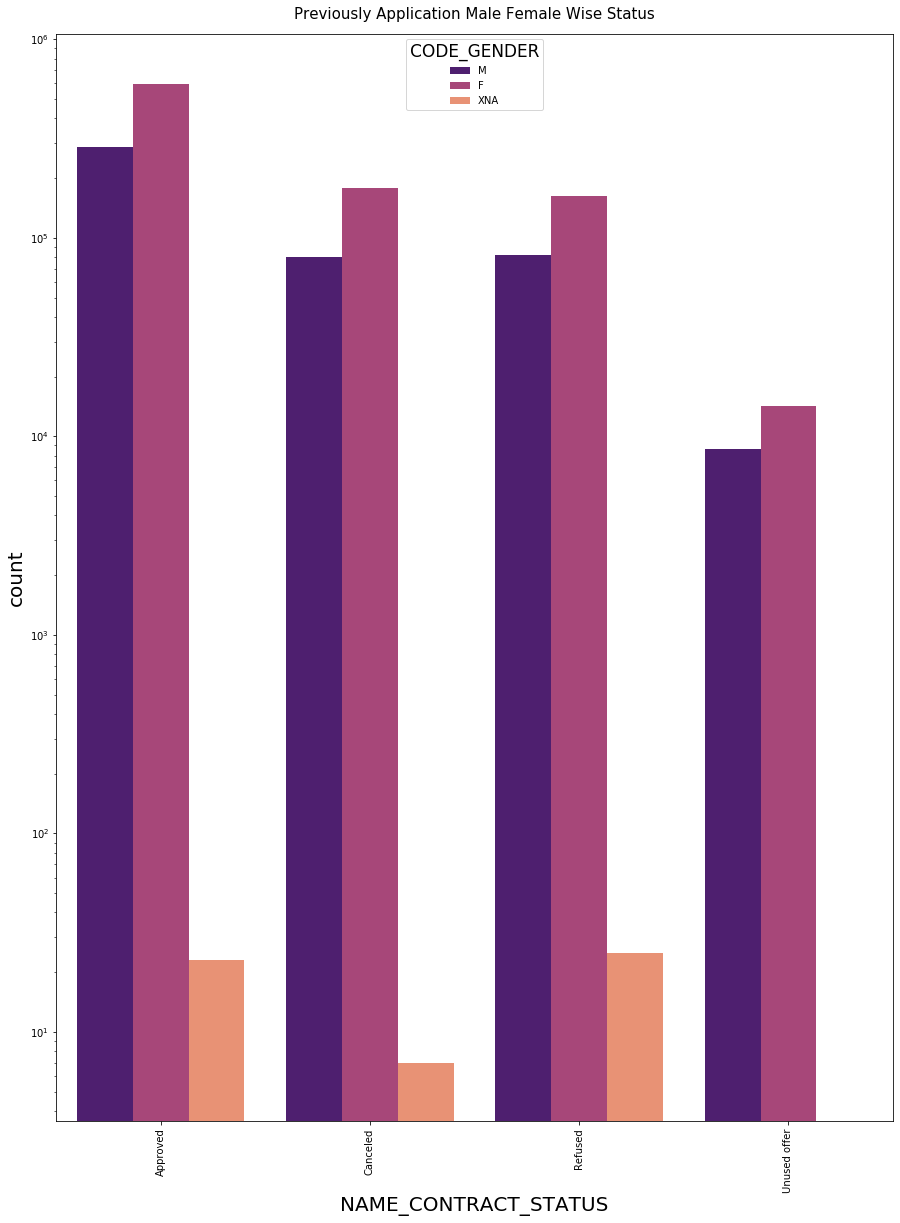

In [75]:
plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Previously Application Male Female Wise Status')

sns.countplot(data = merged_df, x= 'NAME_CONTRACT_STATUS', 
                   order=merged_df['NAME_CONTRACT_STATUS'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.show();

We can see that there is not much difference in the application approval/rejection based on Gender. So we can say that gender has not a major role in approval or rejection of loan.

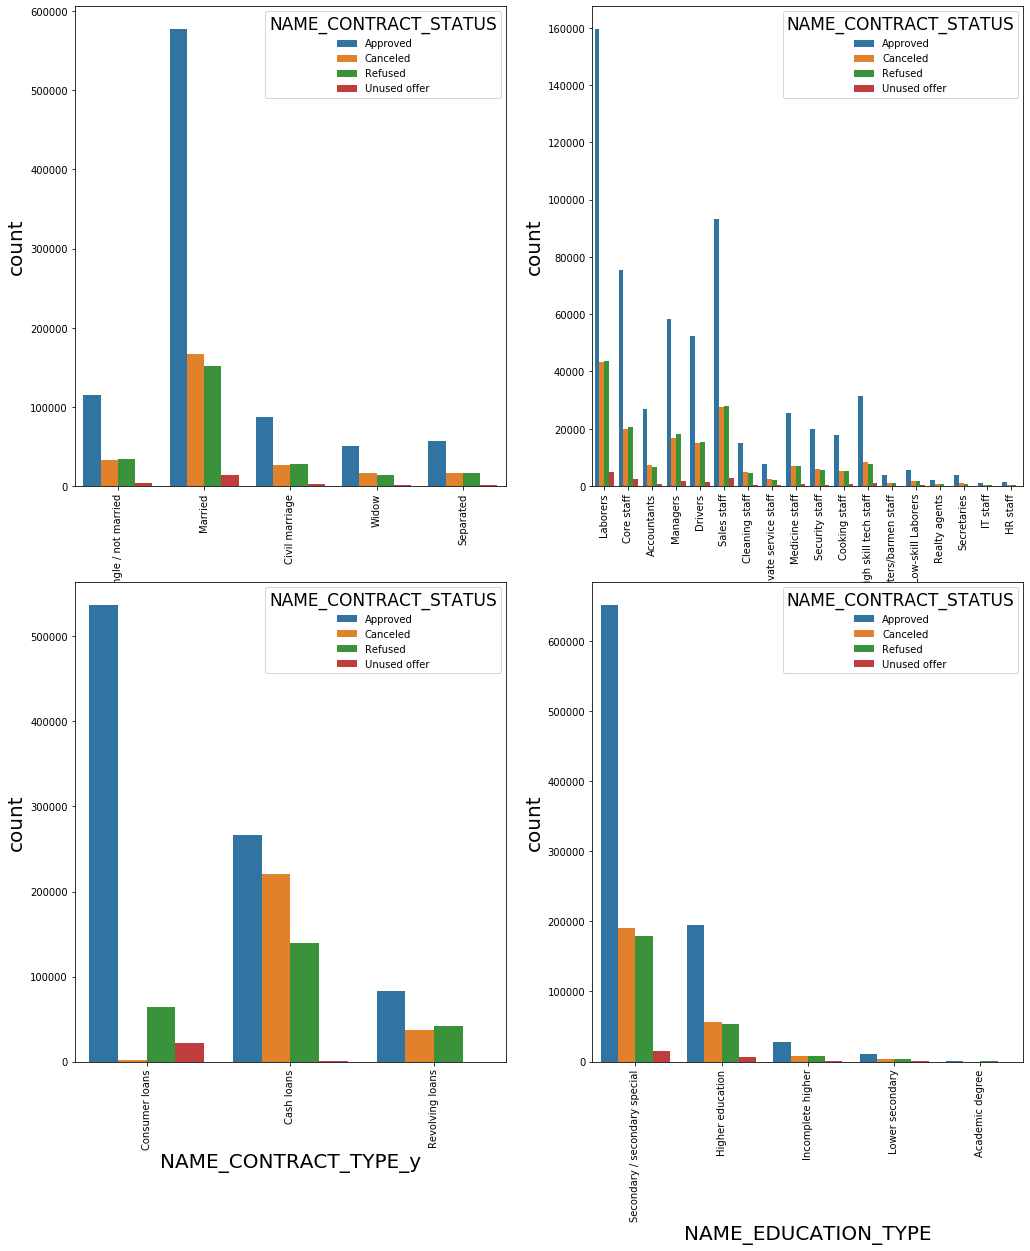

In [76]:
#We will select some catagorical features for analysis 
sub_cat_features = ['NAME_FAMILY_STATUS','OCCUPATION_TYPE','NAME_CONTRACT_TYPE_y','NAME_EDUCATION_TYPE']
plt.figure(figsize = (17, 30))
for i in enumerate(sub_cat_features):
    plt.subplot(3, 2, i[0]+1)
    splot = sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = merged_df)
    plt.xticks(rotation = 90)

We can see from the above that -
1. Married people have the highest amount of Approval, Cancellation,Refused and Unused offers.
2. Similarly labourers have highest amount of Approval, Cancellation,Refused and Unused offers.
3. There are very few Approvals, Cancellations,Refused and Unused offers in case of IT employees and HR.
4. In case of Cash loans and Revolving loans there are higher refusals as compared to consumer loans
5. In case of revolving loans more no of customers have either cancelled the application or bank has refused them. #### So bank may rethink of this product. 
6. Customers with Secondary/sp secondary have highest amount of Approval, Cancellation,Refused and Unused offers.

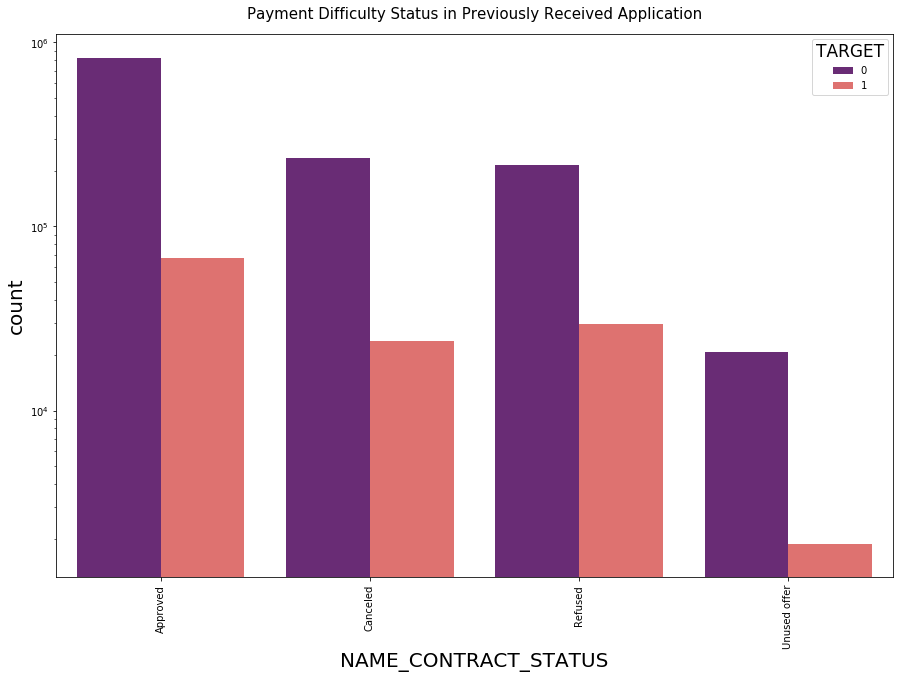

In [77]:
plt.figure(figsize=(15,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Payment Difficulty Status in Previously Received Application')

sns.countplot(data = merged_df, x= 'NAME_CONTRACT_STATUS', 
                   order=merged_df['NAME_CONTRACT_STATUS'].value_counts().index,hue = 'TARGET',palette='magma')
plt.show(); 

1. We can see from the above that in many of the previously rejected cases there is no payment difficulty or payment difficulty percentage is similar to previously approved cases. This can be considered as a loss to the company.
2. In case of previously unused offers the difficulty in payment is relatively very less.

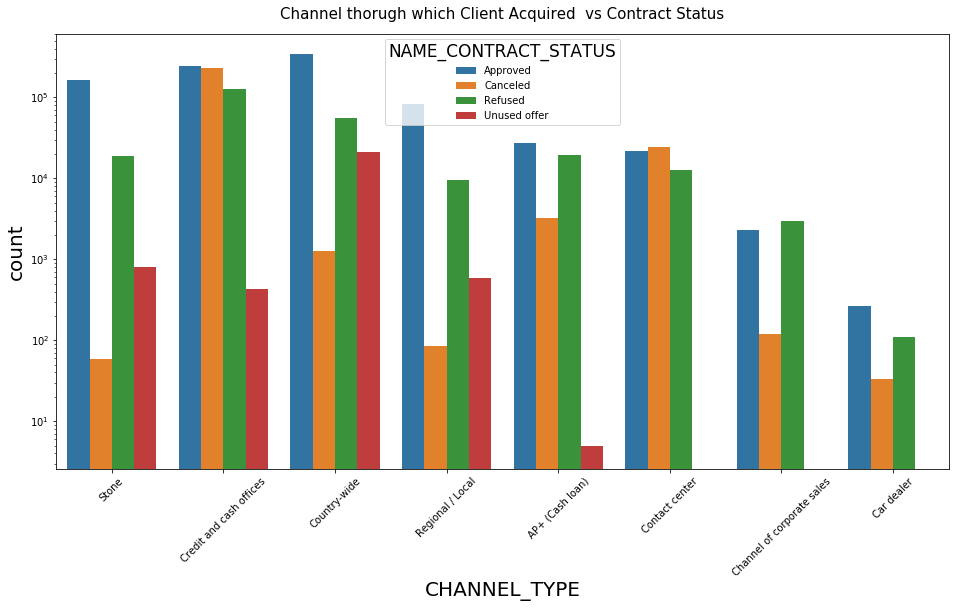

In [78]:
plt.figure(figsize=(16,8))

# subplot 1:Payment Difficulty Income Amount vs Education Status Vs Gender'
plt.xticks(rotation=45)
plt.yscale('log')
sns.countplot(data =merged_df, x='CHANNEL_TYPE', hue ='NAME_CONTRACT_STATUS')
plt.title('Channel thorugh which Client Acquired  vs Contract Status')
plt.show()

We can see from the above that -
1. In case of customers acquired thorugh contact center there is very high percentage of cancellation or refusal by the bank.
2. Highest no of application cancelled in between are in case of customers acquired via credit and cash offices.
3. In case the channel is corporate sales there is high percentage of cancellation compaed to total application received.

<Figure size 2160x1080 with 0 Axes>

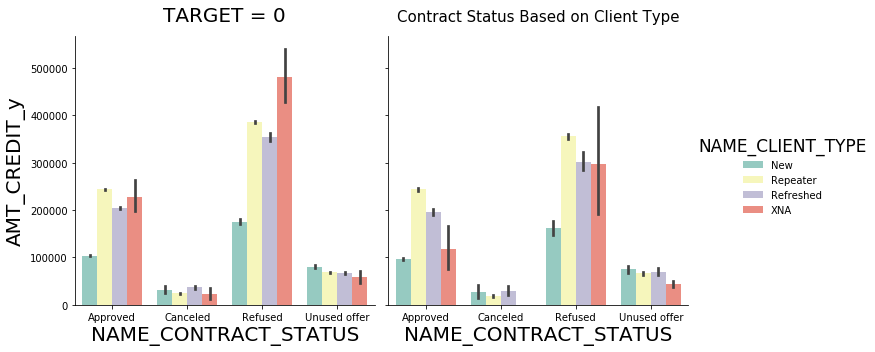

In [79]:
plt.figure(figsize=(30,15))
sns.catplot(x="NAME_CONTRACT_STATUS", y="AMT_CREDIT_y",hue="NAME_CLIENT_TYPE",col='TARGET', data=merged_df, kind="bar",palette="Set3")
plt.title('Contract Status Based on Client Type')
plt.show();

As we can see from the above -
1. The bank needs to improve its rejection mechanism as many of the clients who have earlier refused loans have not faced payment difficulty.
2. There is payment difficulty observed even in case the client is a repeater or refreshed.

### Conclusions and Recommendation 

1. Bank should focus on diversifying its customers base as most of the customers presently as having income less than 3 lakhs.
2. Most of the customers of the bank are either labourers or sales staff. Bank should plan a loan campaign for attracting customers from other professions like IT staff, HR staff, Secretaries as well. This will help the bank to deconcentrate their risk profile.
3. There is less payment difficulty in case of female borrowers.
4. Bank should take step to understand the credit need of customers with academic as presently there are very few such customers with bank.
5. Bank should give preference to customers with less # of credit bureau enquiries. Alternatively, bank can devise a scheme of Risk Premium where in Risk Premium is added to interest rate based on no of credit bureau enquiries.
6. Bank should give preference to customers with more external credit rating source 3. 
7. Bank should give preference to customers who have employed for more days and have a sufficient amount of employment left so as to repay the loan.
8. Bank should exercise greater caution in case if low exposure i.e. exposure of less than 50,000/- loans. Bank may consider taking collateral security or having a regular monitoring mechanism for such customers.
9. In case of Customers with Secondary / secondary special education, customer having car or realty should be preferred.
10. Banks credit appraisal system is Gender neutral which bank can highlight to promote their bank as approval and rejection rate is not affected by gender.
11. In case of revolving loans more no. of customers have either cancelled the application or bank has refused them. So bank may rethink of this product.
12. In many of the previously rejected cases there is no payment difficulty or payment difficulty percentage is similar to previously approved cases. This can be considered as a loss to the company.
13. In case of previously unused offers the difficulty in payment is relatively very less. Bank may have a mechanism of regular follow-up with the customers who have not yet used their offer.
14. In case the channel is corporate sales there is high percentage of cancellation compared to total application received. The bank may want to relook at this channel.